# Convolutional Neural Networks with Keras and TensorFlow - Fashion MNIST dataset
## *Please use Google Colab for this practice. https://research.google.com/colaboratory/

We will use the Fashion MNIST dataset, which consists of 60,000 train and 10000 test images of fashion items. More information about the dataset can be found here (https://keras.io/api/datasets/fashion_mnist/)



In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

(train_data, train_label), (test_data, test_label) = keras.datasets.fashion_mnist.load_data()

print('Training images', train_data.shape)
print('Training labels', train_label.shape)
print('Testing images', test_data.shape)
print('Testing labels', test_label.shape)

Training images (60000, 28, 28)
Training labels (60000,)
Testing images (10000, 28, 28)
Testing labels (10000,)


In [5]:
print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))

Max pixel value 255
Min pixel value 0


Here we will scale[0,1] the data.

In [6]:
train_data = train_data / 255
test_data = test_data / 255

print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))

Max pixel value 1.0
Min pixel value 0.0


Now we will apply one-hot encoding.

In [7]:
train_label_onehot = keras.utils.to_categorical(train_label, 10)
test_label_onehot = keras.utils.to_categorical(test_label, 10)

print('Labels train shape: {}'.format(train_label_onehot.shape))

Labels train shape: (60000, 10)


Let's take a look at the images from this dataset.

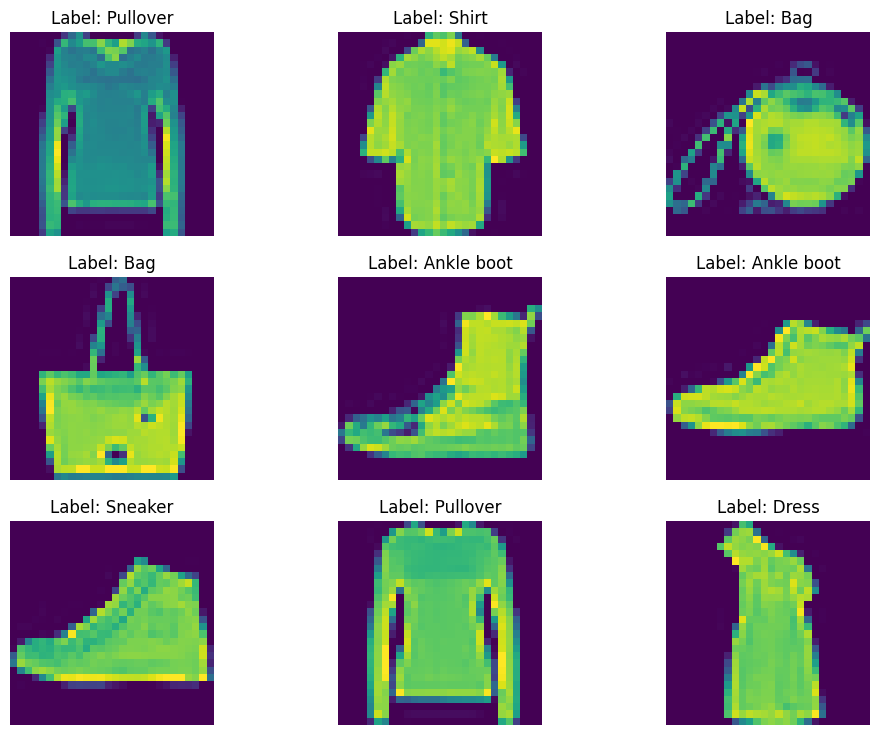

In [8]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(train_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(train_data[i[0]])
    plt.title('Label: ' + str(label_names[train_label[i[0]]]))
    plt.axis('off')

Let's we prepare a model.

In [17]:
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [19]:

inputs = Input(shape=(28, 28, 1))

conv1a = Conv2D(filters=128, kernel_size=3, padding='same')(inputs)

conv1b = Conv2D(filters=128, kernel_size=3, padding='same')(conv1a)

pool1 = MaxPooling2D()(conv1b)

flat = Flatten()(pool1)

dense1 = Dense(64, activation='relu')(flat)

outputs = Dense(10, activation='softmax')(dense1)

# Define the model with inputs and outputs
fminst_1 = Model(inputs, outputs)

fminst_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1605696   
                                                           

Reshape the data.

In [20]:
train_data = np.reshape(train_data, (60000, 28, 28, 1))
print(train_data.shape)

test_data = np.reshape(test_data, (10000, 28, 28, 1))
print(test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Let's we train the model.

In [21]:
fminst_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fminst_1.fit(train_data, train_label_onehot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 942s 2s/step - loss: 0.4032 - accuracy: 0.8576
Epoch 2/10
469/469 [==============================] - 905s 2s/step - loss: 0.2587 - accuracy: 0.9065
Epoch 3/10
469/469 [==============================] - 904s 2s/step - loss: 0.2080 - accuracy: 0.9238
Epoch 4/10
469/469 [==============================] - 915s 2s/step - loss: 0.1752 - accuracy: 0.9353
Epoch 5/10
469/469 [==============================] - 901s 2s/step - loss: 0.1507 - accuracy: 0.9444
Epoch 6/10
469/469 [==============================] - 907s 2s/step - loss: 0.1263 - accuracy: 0.9539
Epoch 7/10
469/469 [==============================] - 907s 2s/step - loss: 0.1113 - accuracy: 0.9585
Epoch 8/10
469/469 [==============================] - 905s 2s/step - loss: 0.0987 - accuracy: 0.9633
Epoch 9/10
469/469 [==============================] - 903s 2s/step - loss: 0.0869 - accuracy: 0.9678
Epoch 10/10
469/469 [==============================] - 903s 2s/step - loss: 0.0744 - accura

In [22]:

from sklearn.metrics import accuracy_score

preds = fminst_1.predict(test_data)

accuracy = accuracy_score(test_label, np.argmax(preds, axis=1))
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

313/313 [==============================] - 48s 151ms/step
The test accuracy is 91.03 %


Let's see how our model works. In the previous step we found that model accuracy is 91%

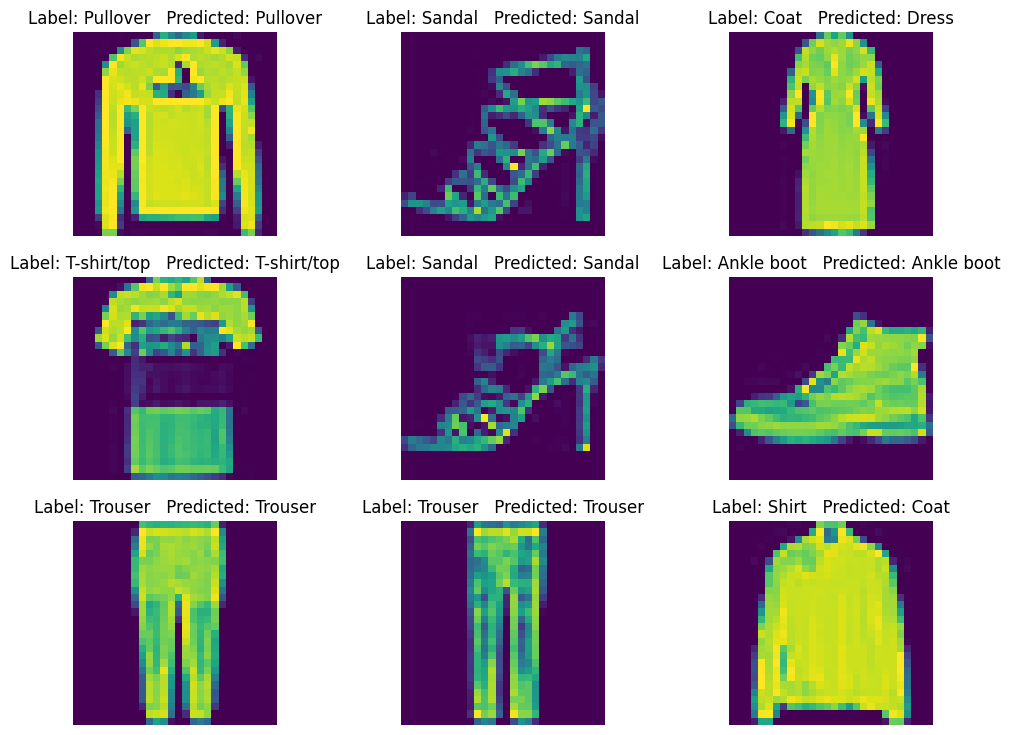

In [23]:
test_data_or = np.reshape(test_data, (10000, 28, 28))
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(test_data_or), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(test_data_or[i[0]])
    plt.title('Label: ' + str(label_names[test_label[i[0]]]) + '   Predicted: ' + str(label_names[np.argmax(preds[i[0]])]))
    plt.axis('off')

It seems our model is performing well.